In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Valores reais (target)
true_reg = np.array([10, 15, 20, 25, 30])

# Valores previstos pelo modelo
pred_reg = np.array([11, 14, 21, 24, 32])

# Cálculo das Métricas de Regressão
# 1. Erro Quadrático Médio (EQM / MSE)
eqm = mean_squared_error(true_reg, pred_reg)
print(f"1. EQM: {eqm:.2f}")

# 2. Erro Absoluto Médio (EAM / MAE) obs.: Erro médio na unidade do alvo
eam = mean_absolute_error(true_reg, pred_reg)
print(f"2. EAM: {eam:.2f}")

# 3. R²-Score (Coeficiente de Determinação) obs.: Porcentagem de variância explicada
r2 = r2_score(true_reg, pred_reg)
print(f"R²-Score: {r2:.4f}")
print(f"    (Significa que o modelo explica {r2*100:.2f}% da variância dos dados)")

1. EQM: 1.60
2. EAM: 1.20
R2-Score: 0.9680
    (Significa que o modelo explica 96.80% da variância dos dados)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



Modelo: Regressão Linear
EQM: 739444712338.71
EAM: 624316.07
R²-Score: 0.660

Modelo: Random Forest
EQM: 43390298923.72
EAM: 62202.73
R²-Score: 0.980


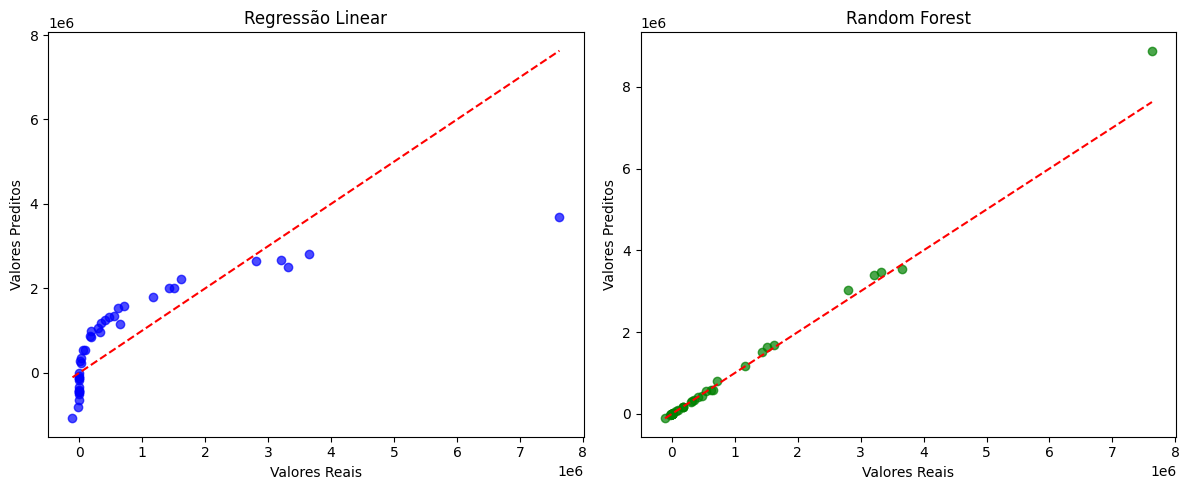

In [13]:
# 1. Criando um dataset fictício
np.random.seed(42)
n = 200

# Dados de entrada
dados = pd.DataFrame({
    'temperatura': np.random.normal(75, 100, n), # em °C
    'pressão': np.random.normal(1, 10, n), # em bar
    'tempo_op': np.random.normal(1, 8, n), # em horas
})

# Dados de saída
# 1. Relação linear
#dados["consumo_energia"] = 2.5*dados["temperatura"] + 1.2*dados["pressão"] + 10*dados["tempo_op"] + np.random.normal(0, 20, n)

# 2. Relação não linear
dados["consumo_energia"] = 2.5*dados["temperatura"] + 1.2*dados["pressão"] + 10*dados["tempo_op"] + 0.3*dados ["temperatura"]**3 - 0.3*dados["pressão"] + np.random.normal(0, 15, n)

# Separando variáveis
X = dados[["temperatura", "pressão", "tempo_op"]]
y = dados["consumo_energia"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar os modelos
# Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# Random Forest
modelo_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Avaliando os modelos
def avaliar_modelo(nome, y_true, y_pred):
    eqm = mean_squared_error(y_true, y_pred)
    eam = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nModelo: {nome}")
    print(f"EQM: {eqm:.2f}")
    print(f"EAM: {eam:.2f}")
    print(f"R²-Score: {r2:.3f}")
    return eqm, eam, r2

resultados = {}
resultados["Regressão Linear"] = avaliar_modelo("Regressão Linear", y_test, y_pred_lr)
resultados["Random Forest"] = avaliar_modelo("Random Forest", y_test, y_pred_rf)

# Comparando graficamente
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Regressão Linear")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color="green", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")

plt.tight_layout()
plt.show()